In [59]:
import setuptools
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [60]:
base_ativos = pd.read_excel('Base_ativos.xlsx')

In [61]:
def excluir_5_dig(COTA):
    return str(COTA)[:6]

def peer(x):
    if x in top10_peers:
        return 'PEER'
    else:
        return 'NAO PEER'

gare11 = ['GARE11.SA']

top10_peers = ['GARE11.SA', 'KNRI11.SA', 'ALZR11.SA', 'TRXF11.SA', 'VIUR11.SA', 'BTLG11.SA', 'BRCO11.SA', 'RBRP11.SA', 'HGRU11.SA', 'GGRC11.SA']

fundos = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA', 'HGRU11.SA',
          'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
          'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA', 'AIEC11.SA',
          'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'JSRE11.SA',
          'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 
          'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA']

fundos_ifix= ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA',
                'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
                'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA', 'AIEC11.SA',
                'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'HGRU11.SA',
                'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 
                'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA', 'GAME11.SA',
                'RZTR11.SA', 'BTRA11.SA', 'SNEL11.SA', 'HTMX11.SA', 'TGAR11.SA', 'JSRE11.SA',
                'MFII11.SA', 'BTHF11.SA', 'RBRF11.SA', 'JSAF11.SA', 'KFOF11.SA', 'RZAK11.SA',
                'BCIA11.SA', 'KISU11.SA', 'XPSF11.SA', 'BPFF11.SA', 'HGFF11.SA', 'SNFF11.SA',
                'RBFF11.SA', 'RVBI11.SA', 'BBFO11.SA', 'KNIP11.SA', 'KNCR11.SA', 'MXRF11.SA', 
                'IRDM11.SA', 'KNHY11.SA', 'CPTS11.SA', 'RECR11.SA', 'HCTR11.SA', 'CLIN11.SA',
                'KNHF11.SA', 'MCCI11.SA', 'HGCR11.SA', 'KNUQ11.SA', 'VGHF11.SA', 'URPR11.SA',
                'VRTA11.SA', 'VGIR11.SA', 'RBRR11.SA', 'VCJR11.SA', 'DEVA11.SA', 'RBRY11.SA', 
                'KNSC11.SA', 'MCRE11.SA', 'VGIP11.SA', 'CVBI11.SA', 'BTCI11.SA', 'XPCI11.SA',  
                'HABT11.SA', 'BCRI11.SA', 'CACR11.SA', 'AFHI11.SA', 'BARI11.SA', 'SNCI11.SA', 
                'KCRE11.SA', 'PORD11.SA', 'MANA11.SA', 'VSLH11.SA', 'OUJP11.SA', 'ARRI11.SA',
                'WHGR11.SA', 'RBRX11.SA', 'HSAF11.SA', 'KIVO11.SA', 'SPXS11.SA',  'CYCR11.SA']



data_inicial = '2024-12-02'
data_final = '2024-12-31'

tab_cotacoes = yf.download(fundos, data_inicial, data_final)['Close']
tab_cotacoes= tab_cotacoes.round(2)
tab_cotacoes.index = pd.to_datetime(tab_cotacoes.index)

tab_gare11 = yf.download(gare11, data_inicial, data_final)['Close']
tab_gare11 = tab_gare11.round(2)
tab_gare11.index = pd.to_datetime(tab_gare11.index)

var_mensal = (tab_cotacoes.loc['2024-12-06'] - tab_cotacoes.loc['2024-12-02'])/tab_cotacoes.loc['2024-12-02']
var_gare11 = (tab_gare11.loc['2024-12-06'] - tab_gare11.loc['2024-12-02'])/tab_gare11.loc['2024-12-02']

tab_mensal = pd.DataFrame(var_mensal)
tab_mensal = tab_mensal.rename(columns={0:'VARIAÇÃO'})

df_gare11 = pd.DataFrame(var_gare11)
df_gare11 = df_gare11.rename(columns = {0:'VARIAÇÃO'})

media_tijolo = (tab_mensal['VARIAÇÃO'].mean())
definitivo_gare11 = (df_gare11['VARIAÇÃO'].mean())

consolidado = {'VAR_TIJOLO':[media_tijolo], 'VAR_GARE11':[definitivo_gare11]}
df_tijoloxgare11 = pd.DataFrame(consolidado)
df_tijoloxgare11

[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  1 of 1 completed


,VAR_TIJOLO,VAR_GARE11
0,-0.031749,-0.001157


In [77]:
data_inicial_teste = '2024-12-27'
data_final_teste = '2024-12-31'

teste = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA']
teste_ativo = yf.download(fundos_ifix, data_inicial_teste, data_final_teste)['Close']
ativo_volume = yf.download(fundos_ifix, data_inicial_teste, data_final_teste)['Volume']
teste_ativo

[*********************100%***********************]  115 of 115 completed
[*********************100%***********************]  115 of 115 completed


Ticker,AFHI11.SA,AIEC11.SA,AJFI11.SA,ALZR11.SA,ARRI11.SA,BARI11.SA,BBFO11.SA,BCIA11.SA,BCRI11.SA,BLMG11.SA,...,VIUR11.SA,VRTA11.SA,VSLH11.SA,WHGR11.SA,XPCI11.SA,XPIN11.SA,XPLG11.SA,XPML11.SA,XPSF11.SA,ZAVI11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-27,90.000000,46.099998,7.35,101.050003,8.04,68.0,60.52,87.150002,60.080002,25.840000,...,5.83,78.809998,3.06,8.50,76.900002,65.910004,94.019997,99.370003,6.38,80.769997
2024-12-30,90.550003,47.139999,7.55,100.750000,8.18,69.5,60.00,86.959999,59.529999,26.040001,...,5.95,79.099998,3.14,8.66,78.160004,67.620003,94.099998,97.669998,6.39,81.349998


In [63]:
ativo_transposto = teste_ativo.T
ativo_transposto = ativo_transposto.round(2)
ativo_transposto = ativo_transposto.rename(columns = {'Ticker':'TICKER'})
ativo_transposto = pd.DataFrame(ativo_transposto)
volume_transposto = ativo_volume.T
volume_transposto = volume_transposto.round(2)
volume_transposto = volume_transposto.rename(columns = {'Ticker':'TICKER'})
volume_transposto = pd.DataFrame(volume_transposto)

base_ativos = base_ativos.rename(columns={'TICKER':'Ticker'})

In [64]:
ativos_merge = pd.merge(base_ativos, ativo_transposto[['2024-12-30', '2024-12-27']],
                        on = ['Ticker'],
                        how='left',
                        suffixes=('', '_PREÇO'))

ativos_merge.rename(columns={pd.Timestamp('2024-12-30 00:00:00'): 'Preço1', pd.Timestamp('2024-12-27 00:00:00'): 'Preço2' }, inplace=True)
ativos_merge['VM'] = ativos_merge['COTAS']*ativos_merge['Preço1']
ativos_merge['P/VP'] = ativos_merge['VM']/ativos_merge['VP MM']
ativos_merge['P/VP'] = ativos_merge['P/VP'].round(2)
ativos_merge['VARIAÇÃO_DIARIA'] = ((ativos_merge['Preço1'] - ativos_merge['Preço2'])/ativos_merge['Preço2'])*100
ativos_merge['VARIAÇÃO_DIARIA'] = ativos_merge['VARIAÇÃO_DIARIA'].round(2)
ativos_merge = ativos_merge.drop(columns=['SUP', 'COTISTAS', 'COTA 2024', 'COTA 2023'])
ativos_merge['Peer_GARE'] = ativos_merge['Ticker'].apply(peer)

ativos_merge = pd.merge(ativos_merge, volume_transposto[['2024-12-30', '2024-12-27']],
                        on = ['Ticker'],
                        how='left',
                        suffixes=('', '_Vol'))

ativos_merge.rename(columns={pd.Timestamp('2024-12-30 00:00:00'): 'Volume1', pd.Timestamp('2024-12-27 00:00:00'): 'Volume2' }, inplace=True)
ativos_merge = ativos_merge.drop(columns=['Volume2'])
ativos_merge= ativos_merge.rename(columns={'Volume1':'Quantidade'})
ativos_merge['Volume'] = ativos_merge['Preço1']*ativos_merge['Quantidade']
ativos_merge['%PL'] = ativos_merge['Volume']/ativos_merge['VP MM']
ativos_merge

,Ticker,TIPO,VP MM,COTAS,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,DIV Y1,DIV Y12,Preço1,Preço2,VM,P/VP,VARIAÇÃO_DIARIA,Peer_GARE,Quantidade,Volume,%PL
0,KNRI11.SA,HIB Tijolo,4.553042e+09,28204047,7.592850e+06,1.442641e+08,1.0000,11.000000,136.90,136.98,3.861134e+09,0.85,-0.06,PEER,39580.0,5418502.00,0.001190
1,TVRI11.SA,HIB Tijolo,1.614022e+09,15919690,1.540689e+06,2.927309e+07,0.9800,10.730000,87.20,84.92,1.388197e+09,0.86,2.68,NAO PEER,0.0,0.00,0.000000
2,ALZR11.SA,HIB Tijolo,1.279322e+09,12226625,2.312998e+06,4.394697e+07,0.8055,8.358938,100.75,101.05,1.231832e+09,0.96,-0.30,PEER,12309.0,1240131.75,0.000969
3,GARE11.SA,XXXX,1.350740e+09,147458223,6.658875e+06,1.265186e+08,0.0920,0.974000,8.50,8.70,1.253395e+09,0.93,-2.30,PEER,820610.0,6975185.00,0.005164
4,RBRP11.SA,HIB Tijolo,9.339984e+08,12179186,1.658621e+06,3.151379e+07,0.5400,5.710000,49.95,49.23,6.083503e+08,0.65,1.46,PEER,16319.0,815134.05,0.000873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,SPXS11.SA,Recebivel,1.884556e+08,20189040,4.815625e+05,9.149687e+06,0.1000,1.073000,8.69,8.53,1.754428e+08,0.93,1.88,NAO PEER,36940.0,321008.60,0.001703
113,ARRI11.SA,Recebivel,1.726284e+08,20138980,5.812750e+05,1.104422e+07,0.0900,1.070000,8.18,8.04,1.647369e+08,0.95,1.74,NAO PEER,26608.0,217653.44,0.001261
114,CYCR11.SA,Recebivel,3.428976e+08,36549445,7.738895e+05,1.470390e+07,0.0950,1.130000,8.48,8.49,3.099393e+08,0.90,-0.12,NAO PEER,25522.0,216426.56,0.000631
115,CLIN11.SA,Recebivel,4.192289e+08,4346763,1.412549e+06,2.683842e+07,1.0000,10.850000,81.05,80.45,3.523051e+08,0.84,0.75,NAO PEER,9866.0,799639.30,0.001907


In [75]:
#CRIO UM DATAFRAME PARA VER AS MEDIAS DO SETOR EM COMPARAÇÃO AO GARE
medias_setores = ativos_merge.groupby(by = 'TIPO')[['VARIAÇÃO_DIARIA', 'P/VP', 'Volume', 'Quantidade', '%PL']].mean().round(4)
medias_setores['VARIAÇÃO_DIARIA'] = medias_setores['VARIAÇÃO_DIARIA'].astype(float)
medias_setores['VARIAÇÃO_DIARIA'] = medias_setores['VARIAÇÃO_DIARIA'].round(2)
medias_setores['Volume'] = (medias_setores['Volume']/1000).round(0)
medias_setores['Quantidade'] = (medias_setores['Quantidade']/1000).round(0)
medias_setores

,VARIAÇÃO_DIARIA,P/VP,Volume,Quantidade,%PL
TIPO,,,,,
Desenvolvimento,0.63,0.8400,3643.0,41.0,0.0019
Fof,-0.10,0.8046,1264.0,154.0,0.0015
HIB Tijolo,0.80,0.7350,1383.0,45.0,0.0008
Lajes,0.27,0.6164,1113.0,23.0,0.0009
Logistico,0.84,0.7327,1996.0,33.0,0.0011
Outros Imóveis,-0.32,0.9275,1687.0,36.0,0.0035
Recebivel,0.87,0.8313,2193.0,139.0,0.0017
Renda Urbana,0.32,0.8575,2502.0,27.0,0.0011
Shopping,-0.48,0.7056,3435.0,44.0,0.0010


In [76]:
medias_peers = ativos_merge.query('Peer_GARE == "PEER"')
medias_peers = medias_peers.sort_values(by=['VARIAÇÃO_DIARIA'], ascending=False).iloc[:10, :]
medias_peers = medias_peers.drop(columns = ['TIPO','VM','COTAS','LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'DIV Y1', 'DIV Y12', 'Preço1', 'Preço2', 'Peer_GARE'])
medias_peers['%PL'] = medias_peers['Volume']/medias_peers['VP MM']
medias_peers['Ticker'] = medias_peers['Ticker'].apply(excluir_5_dig)
medias_peers['Volume'] = (medias_peers['Volume']/1000).round(0)
medias_peers['Quantidade'] = (medias_peers['Quantidade']/1000).round(0)
medias_peers = medias_peers[['Ticker', 'VARIAÇÃO_DIARIA', 'P/VP', 'Volume', 'Quantidade', '%PL']]
medias_peers

,Ticker,VARIAÇÃO_DIARIA,P/VP,Volume,Quantidade,%PL
10,VIUR11,2.06,0.67,110.0,18.0,0.000459
15,BRCO11,1.63,0.86,3499.0,34.0,0.001853
4,RBRP11,1.46,0.65,815.0,16.0,0.000873
8,TRXF11,1.14,0.98,3371.0,33.0,0.001606
12,BTLG11,0.06,0.90,6760.0,72.0,0.001494
7,HGRU11,0.03,0.95,5531.0,47.0,0.001914
0,KNRI11,-0.06,0.85,5419.0,40.0,0.001190
2,ALZR11,-0.30,0.96,1240.0,12.0,0.000969
18,GGRC11,-0.30,0.87,1827.0,186.0,0.001317
3,GARE11,-2.30,0.93,6975.0,821.0,0.005164


In [67]:
top_10_altas = ativos_merge.nlargest(10, 'VARIAÇÃO_DIARIA')
top_10_baixas = ativos_merge.nsmallest(10, 'VARIAÇÃO_DIARIA')

top_10_altasXbaixas = pd.concat([top_10_altas,top_10_baixas]).reset_index(drop=True)
top_10_altasXbaixas = top_10_altasXbaixas.drop(columns = ['TIPO', 'VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço1',
                                    'Preço2', 'VM', 'P/VP'])
top_10_altasXbaixas

,Ticker,DIV Y1,DIV Y12,VARIAÇÃO_DIARIA,Peer_GARE,Quantidade,Volume,%PL
0,TRBL11.SA,0.620,8.66000,7.00,NAO PEER,8837.0,613641.28,0.000799
1,DEVA11.SA,0.430,5.70000,5.18,NAO PEER,31976.0,934978.24,0.000670
2,CACR11.SA,1.340,14.89000,3.78,NAO PEER,28262.0,2448902.30,0.005255
3,RBRY11.SA,0.950,10.66000,3.41,NAO PEER,15854.0,1404188.78,0.001137
4,AJFI11.SA,0.070,0.76988,2.72,NAO PEER,17595.0,132842.25,0.000343
5,TVRI11.SA,0.980,10.73000,2.68,NAO PEER,0.0,0.00,0.000000
6,VSLH11.SA,0.040,0.44000,2.61,NAO PEER,45871.0,144034.94,0.000435
7,XPIN11.SA,0.740,7.15000,2.59,NAO PEER,5512.0,372721.44,0.000496
8,KORE11.SA,1.250,13.75000,2.45,NAO PEER,14847.0,1239724.50,0.001215
9,AIEC11.SA,1.220,8.24000,2.26,NAO PEER,6769.0,319090.66,0.000776


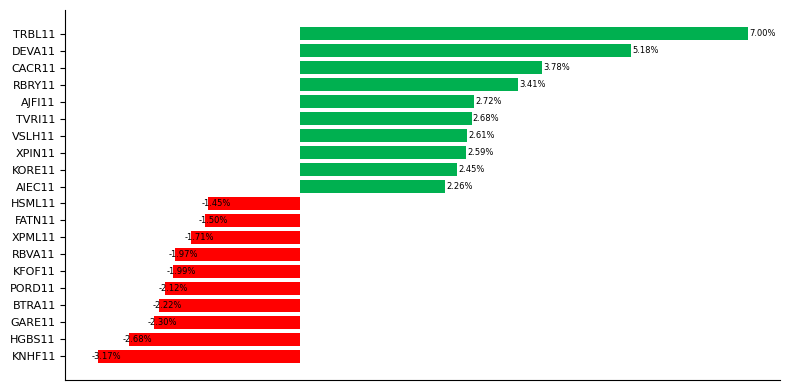

In [68]:
top_10_altas = ativos_merge.nlargest(10, 'VARIAÇÃO_DIARIA')
top_10_baixas = ativos_merge.nsmallest(10, 'VARIAÇÃO_DIARIA')

top_10_altasXbaixas = pd.concat([top_10_altas,top_10_baixas]).reset_index(drop=True)

top_10_altasXbaixas = top_10_altasXbaixas.drop(columns = ['TIPO', 'VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço1',
                                    'Preço2', 'VM', 'P/VP'])
top_10_altasXbaixas = top_10_altasXbaixas.sort_values(by='VARIAÇÃO_DIARIA', ascending = True)
top_10_altasXbaixas['Ticker'] = top_10_altasXbaixas['Ticker'].apply(excluir_5_dig)

fig, ax = plt.subplots(figsize=(8, 4))

# Criar as barras horizontais com cores baseadas na variação diária
graf_barras = ax.barh(
    top_10_altasXbaixas['Ticker'], 
    top_10_altasXbaixas['VARIAÇÃO_DIARIA'], 
    color=['#00B050' if var > 0 else '#FF0000' for var in top_10_altasXbaixas['VARIAÇÃO_DIARIA']]
)

# Adicionar rótulos de dados às barras
for barra in graf_barras:
    largura = barra.get_width()
    deslocamento = 0.1 if largura < 0 else 0.02
    ax.text(
        largura - deslocamento if largura < 0 else largura + deslocamento, 
        barra.get_y() + barra.get_height() / 2,
        f'{largura:,.2f}%',
        ha='left', 
        va='center', 
        fontsize=6, 
        color='black'  # Cor dos rótulos de texto
    )

# Personalizar o gráfico
ax.set_ylabel('', fontsize=12, color='black')  # Nome do eixo Y em branco
ax.get_xaxis().set_visible(False)  # Ocultar eixo X
ax.spines['top'].set_visible(False)  # Ocultar borda superior
ax.spines['right'].set_visible(False)  # Ocultar borda direita
ax.spines['bottom'].set_visible(True) # Ocultar borda inferior
ax.spines['left'].set_color('black') # Alterando cor da linha do eixo Y
ax.tick_params(axis='y', labelsize=8, color = 'black') 

# Ajustar rótulos do eixo Y para ficarem brancos
for label in ax.get_yticklabels():
    label.set_color('Black')  # Define a cor dos rótulos do eixo Y
    label.set_fontsize(8)  # Ajusta o tamanho da fonte, se necessário

# Salvar o gráfico em um arquivo PNG
fig.savefig('VARIAÇÕES_DIARIAS.png', transparent=True, dpi=400, bbox_inches='tight')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [69]:
base_dividendos = ativos_merge.copy()

base_dividendos = base_dividendos.drop(columns = ['VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço2', 'VM'])
base_dividendos['DIV Y1'] = base_dividendos['DIV Y1'].round(2)
base_dividendos['DIV Y12'] = base_dividendos['DIV Y12'].round(2)

base_dividendos['YIELD 1M'] = ((base_dividendos['DIV Y1']/base_dividendos['Preço1'])*100).round(2)
base_dividendos['YIELD 12M'] = ((base_dividendos['DIV Y12']/base_dividendos['Preço1'])*100).round(2)
base_dividendos

,Ticker,TIPO,DIV Y1,DIV Y12,Preço1,P/VP,VARIAÇÃO_DIARIA,Peer_GARE,Quantidade,Volume,%PL,YIELD 1M,YIELD 12M
0,KNRI11.SA,HIB Tijolo,1.00,11.00,136.90,0.85,-0.06,PEER,39580.0,5418502.00,0.001190,0.73,8.04
1,TVRI11.SA,HIB Tijolo,0.98,10.73,87.20,0.86,2.68,NAO PEER,0.0,0.00,0.000000,1.12,12.31
2,ALZR11.SA,HIB Tijolo,0.81,8.36,100.75,0.96,-0.30,PEER,12309.0,1240131.75,0.000969,0.80,8.30
3,GARE11.SA,XXXX,0.09,0.97,8.50,0.93,-2.30,PEER,820610.0,6975185.00,0.005164,1.06,11.41
4,RBRP11.SA,HIB Tijolo,0.54,5.71,49.95,0.65,1.46,PEER,16319.0,815134.05,0.000873,1.08,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,SPXS11.SA,Recebivel,0.10,1.07,8.69,0.93,1.88,NAO PEER,36940.0,321008.60,0.001703,1.15,12.31
113,ARRI11.SA,Recebivel,0.09,1.07,8.18,0.95,1.74,NAO PEER,26608.0,217653.44,0.001261,1.10,13.08
114,CYCR11.SA,Recebivel,0.10,1.13,8.48,0.90,-0.12,NAO PEER,25522.0,216426.56,0.000631,1.18,13.33
115,CLIN11.SA,Recebivel,1.00,10.85,81.05,0.84,0.75,NAO PEER,9866.0,799639.30,0.001907,1.23,13.39
